In [1]:
# Loading essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('kaggle_fake_train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [5]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [6]:
df.title[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [7]:
# df.text[0]

In [8]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

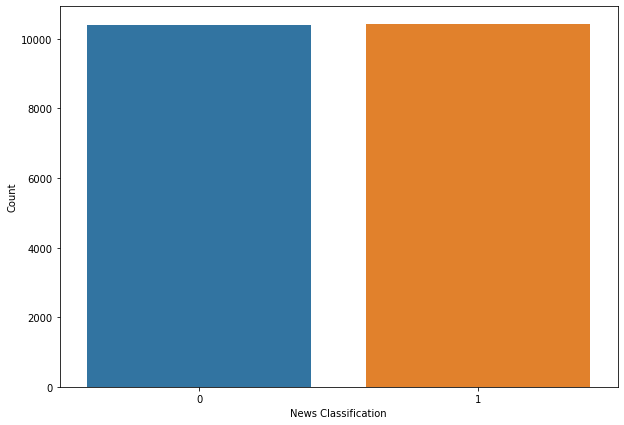

In [9]:
# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

# Data Cleaning and Preprocessing

In [10]:
df.shape

(20800, 4)

In [11]:
df.isna().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
news = df.drop(columns ='author')

In [13]:
news.dropna(inplace = True)

In [14]:
news.shape

(20203, 3)

In [15]:
news.isna().sum()

title    0
text     0
label    0
dtype: int64

In [16]:
news.reset_index(inplace=True)

In [17]:
# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [18]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):
    # Cleaning special character from the news-title
    title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.text[i])

    # Converting the entire news-title to lower case
    title = title.lower()

    # Tokenizing the news-title by words
    words = title.split()

    # Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]

    # Stemming the words
    words = [ps.stem(word) for word in words]

    # Joining the stemmed words
    title = ' '.join(words)

    # Building a corpus of news-title
    corpus.append(title)

In [19]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [20]:
X.shape

(20203, 5000)

In [21]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
# Extracting dependent variable from the dataset
y = news['label']

In [23]:
tfidf_v.get_feature_names()[:5]

['aaron', 'abandon', 'abc', 'abe', 'abedin']

In [24]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

# Model Building

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Multinomial Naive Bayes

In [26]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [28]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2*100,2)))
print("Recall score is: {}".format(round(score3*100,2)))

---- Scores ----
Accuracy score is: 89.19%
Precision score is: 91.85
Recall score is: 84.71


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [30]:
nb_cm

array([[1981,  144],
       [ 293, 1623]], dtype=int64)

# Hyperparameter tuning for Naive Bayes Classifier

In [45]:
from sklearn import metrics

In [46]:
param_grid = {'alpha' : [0.1,0.2,0.3,0.4,0.01,0.001]}

In [48]:
from sklearn.model_selection import GridSearchCV

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8955704033655036
Alpha: 0.1, Score : 0.894580549368968
Alpha: 0.2, Score : 0.8933432318732987
Alpha: 0.30000000000000004, Score : 0.892848304875031
Alpha: 0.4, Score : 0.892848304875031
Alpha: 0.5, Score : 0.8923533778767632
Alpha: 0.6000000000000001, Score : 0.892600841375897
Alpha: 0.7000000000000001, Score : 0.8918584508784955
Alpha: 0.8, Score : 0.8921059143776293
Alpha: 0.9, Score : 0.8921059143776293


In [51]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

In [52]:
classifier.coef_[0]

array([-9.62633179, -9.03149031, -8.80490751, ..., -9.278065  ,
       -8.20119823, -8.62029177])

In [53]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.384980766500932, 'clinton'),
 (-5.486699920463501, 'trump'),
 (-5.710794302558569, 'hillari'),
 (-5.923805072934185, 'us'),
 (-5.928543266523332, 'elect'),
 (-6.1222492571051985, 'peopl'),
 (-6.13401668588219, 'state'),
 (-6.184960385059967, 'email'),
 (-6.195772111630376, 'vote'),
 (-6.212173599718343, 'one'),
 (-6.299641879030085, 'would'),
 (-6.301465271427628, 'like'),
 (-6.310912660745725, 'fbi'),
 (-6.311321458040887, 'hillari clinton'),
 (-6.3592162241078665, 'time'),
 (-6.37150755216102, 'american'),
 (-6.376000915074145, 'russia'),
 (-6.380482761625688, 'said'),
 (-6.404353982507587, 'presid'),
 (-6.4050913017593345, 'war')]

In [54]:
MNB = MultinomialNB(alpha = 0.001)
# training the mew model
MNB.fit(X_train, y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [55]:
temp_y_pred = MNB.predict(X_test)

In [56]:
score = accuracy_score(y_test, temp_y_pred)
score*100

89.50754763672359

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
LR_Classifier = LogisticRegression(random_state=0)
LR_Classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# Predicting the Test set results
LR_y_pred = LR_Classifier.predict(X_test)

In [59]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, LR_y_pred)
score2 = precision_score(y_test, LR_y_pred)
score3 = recall_score(y_test, LR_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2*100,2)))
print("Recall score is: {}".format(round(score3*100,2)))

---- Scores ----
Accuracy score is: 94.41%
Precision score is: 93.47
Recall score is: 94.83


In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
LR_CM = confusion_matrix(y_test, LR_y_pred)
LR_CM

array([[1998,  127],
       [  99, 1817]], dtype=int64)

Hyperparameter tuning for Logistic Regression

In [61]:
param_grid_LG = {'C': [1, 5, 10, 15, 20]}

In [62]:
# Creating an object of the Grid Search class
grid = GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid_LG, verbose=3, cv=5)
# finding the best parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=1, score=0.951, total=   3.7s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] ................................. C=1, score=0.949, total=   3.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


[CV] ................................. C=1, score=0.937, total=   4.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.948, total=   3.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.946, total=   3.3s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.956, total=   5.8s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.960, total=   4.5s
[CV] C=5 .............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................. C=5, score=0.942, total=   5.8s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.956, total=   4.3s
[CV] C=5 .............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................. C=5, score=0.956, total=   6.5s
[CV] C=10 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.954, total=   8.4s
[CV] C=10 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.962, total=   6.0s
[CV] C=10 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.942, total=   5.8s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.957, total=   3.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.958, total=   4.4s
[CV] C=15 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=15, score=0.956, total=   6.2s
[CV] C=15 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=15, score=0.961, total=   5.5s
[CV] C=15 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=15, score=0.941, total=   6.1s
[CV] C=15 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=15, score=0.955, total=   6.1s
[CV] C=15 ............................................................
[CV] ................................ C=15, score=0.959, total=   4.2s
[CV] C=20 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=20, score=0.957, total=   5.9s
[CV] C=20 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=20, score=0.959, total=   6.2s
[CV] C=20 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=20, score=0.941, total=   6.0s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.955, total=   5.8s
[CV] C=20 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.2min finished


[CV] ................................ C=20, score=0.959, total=   6.4s


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 15, 20]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [63]:
alpha = grid.best_params_['C']
alpha

10

In [64]:
LR = LogisticRegression(C=10, random_state=0)
LR.fit(X_train, y_train)

C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
temp_y_pred = LR.predict(X_test)

In [66]:
score = accuracy_score(y_test, temp_y_pred)
score

0.9524870081662955

In [72]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = tfidf_v.transform([final_news]).toarray()
  return LR.predict(temp)

In [73]:
# Loading the dataset
df_test = pd.read_csv('kaggle_fake_test.csv')

In [74]:
df = df_test['title']

In [75]:
# For generating random integer
from random import randint

In [76]:
# Predicting values
row = randint(0,df.shape[0]-1)
print(row)
sample_news = df[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

2732
News: In Chicago and Philadelphia, the Difference a Park Makes - The New York Times
Prediction: This is a FAKE news!
